# PHAS0029 Session 7:  More Ordinary Differential Equations

_Author: Louise Dash louise.dash@ucl.ac.uk, 
last updated 24.02.2021_

In this session we'll expand on the Runge Kutta approach we met in session 6, and apply it to more situations you're likely to come across in physics, using a non-linear pendulum as an example system.



## Simultaneous first-order differential equations

Often we're going to want to solve systems which involve differential equations with more than one variable. For example, we could have a system involving $x(t)$ and $y(t)$:

$$ \frac{dx}{dt}  = xy - x, \\ \frac{dy}{dt}  = y - xy + \sin^2(\omega t)$$


We can generalise this type of problem using vector notation:

$$ \frac{d \mathbf{r}}{dt} = {\mathbf f}({\mathbf r},t),$$

where $\mathbf r$ is a general vector ${\mathbf r} = (x, y, \ldots)$, and ${\mathbf f}({\mathbf r},t)$ is a corresponding vector of _functions_ $f_x({\mathbf r},t), f_y({\mathbf r},t)), \ldots$. Note that this is just a very concise way of saying that we have a simultaneous system of equations.

If we wanted to solve a system like this analytically, things could get complicated very quickly. This is where the real strength of numerical approaches comes in, as it's relatively simple to extend the approaches we've already used to a multi-variable system.

To see this, let's do a Taylor expansion of our vector ${\mathbf r}$:

$$ {\mathbf r}(t + h) = {\mathbf r}(t) + h \frac{d {\mathbf r}}{dt} + \mathcal{O}(h^2) \\
\qquad = {\mathbf r}(t) + h {\mathbf f}({\mathbf r},t) + \mathcal{O}(h^2) $$

which we can see is just an extension of what we had for the Euler method. The Runge-Kutta method can also be generalised in the same way.

### Coding this example

To start, we'll import the modules we'll need - in this case just the standard numpy and matplotlib:

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt


Just as we did in the previous session, we're going to write a python function to represent our equation

$$ \frac{d \mathbf{r}}{dt} = {\mathbf f}({\mathbf r},t),$$

Whereas before our function depended on $x(t)$ and $t$, now it depends on a vector ${\mathbf r}(t)$ and $t$:

In [2]:
def example_function(r,t):
    '''Definition of the vector function to be solved
    Inputs are r (a vector of x and y) and t'''
    x = r[0] # first element of r represents x, etc
    y = r[1] # second element of r represents y, etc
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    return np.array([fx,fy],float) # convert fx and fy to an array form and ensure it's a float

Next we need to define our basic variables, the time interval, and the step. We'll take as our initial conditions
$$ x(t=0) = 1 \\
y(t=0) = 1 $$

In [3]:
# basic variables
tstart = 0.0 # start time
tend = 10.0  # end time
N = 1000     # number of points for Runge-Kutta
h = (tend - tstart)/N  # step length

# define an array of timepoints
tpoints = np.arange(tstart, tend, h)

# define the initial conditions in an array:
# at t = 0, x = y = 1
r = np.array([1.0,1.0])

Now we'll rewrite our 4th-order Runge Kutta function. To extend this to two dimensions, we'll use arrays for both the $x$ and $y$ components - the Runge Kutta equations themselves are identical though, just with $x$ replaced by ${\mathbf r}$. If we wanted to extend this to higher dimensions (e.g. if we had three, or more, simultaneous equations to solve for), then this is easy to do.

We'll also make one more change to the way our Runge Kutta function works - we'll include an extra argument, which will be the function we want to call from within the Runge Kutta function. This makes it much easier to use the function for multiple differential equation systems.

In [4]:
def RungeKutta2d(r,tpoints,function):
    '''Fourth-order Runge-Kutta rewritten for two or more simultaneous equations
    Inputs: r: array of values, one for each equation in the system
            tpoints: array of time values.
            function: the function to use to solve the system
    Outputs: [xpoints, ypoints]: solutions for x(t) and y(t), numpy arrays of same length as tpoints'''
    
    ### When you reuse this function in your own work, remember:
    ### 1) add comments to indicate where you reused it from (and any other comments you want)
    ### 2) you DON'T need to change ANY of the code itself or rename any variables
    
    xpoints = [] # initialise empty arrays
    ypoints = []
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        # The following is the same as in the previous session, 
        # but with x->r and calling the specified function
        k1 = h*function(r,t) 
        k2 = h*function(r+0.5*k1, t+0.5*h)
        k3 = h*function(r+0.5*k2, t+0.5*h)
        k4 = h*function(r+k3, t+h)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    return np.array([xpoints, ypoints]) # convert output to numpy array with 2 rows and N columns
   

Now we can call the Runge Kutta function to solve the system. Note that we now need to pass the name of the function representing the system, in this case our `example_function()`.

Let's also check what shape the resulting array "`rsol`" has.

In [5]:
# this will be an array of the x and y solutions to 
# the function specified in "example_function()"
rsol = RungeKutta2d(r,tpoints,example_function) 

print("shape of rsol:", np.shape(rsol))

shape of rsol: (2, 1000)


We can see that the results array has two rows and ($N = $) 1000 columns. The first row contains the results for $x(t)$ and the second row $y(t)$. Now we can go ahead and plot these.

<IPython.core.display.Javascript object>


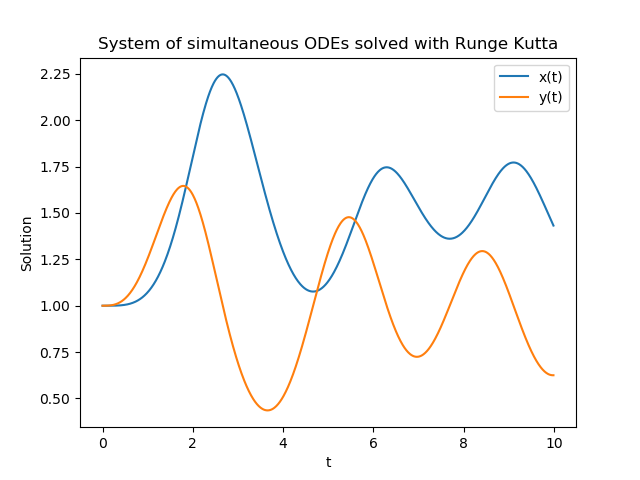

In [6]:
plt.figure()
plt.plot(tpoints,rsol[0],label="x(t)") # the first row of rsol
plt.plot(tpoints,rsol[1],label="y(t)") # the second row of rsol
plt.legend(loc="best")
plt.title("System of simultaneous ODEs solved with Runge Kutta")
plt.xlabel("t")
plt.ylabel("Solution");

It seems to work!

## Second-order differential equations

This technique is even more useful once we realise that we can use it to solve second-order differential equations, by splitting a second-order equation into two simultaneous first-order equations.

For example, consider the second-order equation for an object falling under the effect of gravitational acceleration $g$:

$$ \frac{d^2 y}{dt^2} = -g$$

This can be rewritten in the form of two simultaneous first-order equations:

$$ \frac{dy}{dt} = v_y = f(y), \\ \frac{d v_y}{dt} = -g = f(v_y),$$

which when solved will give us $y(t)$ and $v_y(t)$.

We'll write the function in the form $f({\mathbf r})$ using these equations - where originally we had the components of $\mathbf r$ labelled as $x$ and $y$, here they have become $y$ and $v_y$. To form a vector from these quantities is somewhat counter-intuitive from a physics perspective, but makes sense from a *computational* perspective.


Rather than over-writing our `example_function()` however, we'll now write a completely new function and send that as an argument to our Runge Kutta function.

In [7]:
def gravity(r,t): 
    '''Definition of the vector function to be solved
    for particle subject to gravitational acceleration.
    Inputs:
    r: vector of posn (r[0]) and velocity (r[1])
    t: time point - not explicitly used in this particular function, but required by the form of 
                    our general Runge Kutta function (i.e. essentially a dummy variable in this case)
    '''
    y = r[0]    # first element of r represents the y-position of the particle
    vy = r[1]   # second element of r represents the y-velocity of the particle
    fy = vy     # dy/dt is velocity
    fvy = -g    # dvy/dt is acceleration, i.e. -g
    return np.array([fy,fvy]) # convert fy and fvy to an array form

Now let's set up our system and solve it. We'll calculate for a period of 5 seconds, with an initial height of 10 m and initial $y$-velocity 10 m/s:

<IPython.core.display.Javascript object>


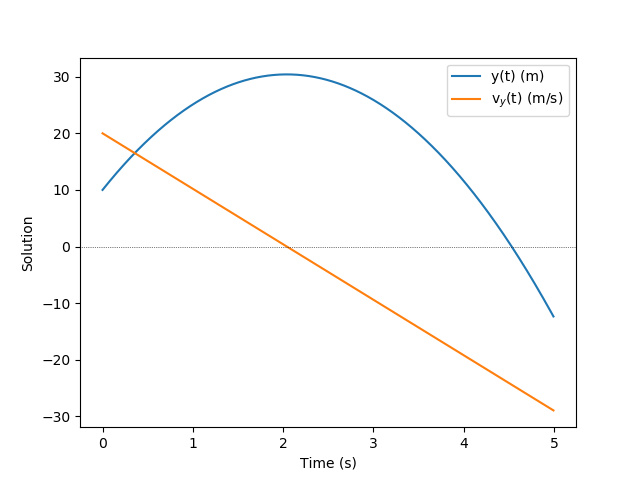

In [8]:
g = 9.8 # gravitational acceleration in m/s^2

tstart = 0.0
tend = 5.0            # solve for a period of 5 seconds.
N = 1000              # number of points for Runge-Kutta
h = (tend - tstart)/N # calculate timestep for this number of points

tpoints = np.arange(tstart, tend, h)

# set up initial conditions
initialy = 10 # initial y position, in metres
intialvy = 20 # initial y-velocity in m/s. Positive, so it's thrown upwards
r = np.array([initialy, intialvy])

# get the soln from Runge Kutta function
# using the "gravity()" function
rsol = RungeKutta2d(r,tpoints, gravity) # this will be an array of the x and y solutions

# plot results
plt.figure()
plt.plot(tpoints,rsol[0],label="y(t) (m)")
plt.plot(tpoints,rsol[1],label="v$_y$(t) (m/s)")
plt.legend()
plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at y (or v_y) = 0
plt.xlabel("Time (s)")
plt.ylabel("Solution");


As we'd expect, the particle rises to its maximum height and then falls, while the velocity decreases linearly, passing through zero at the highest point of the trajectory. It all works!

## Your task: A non-linear pendulum

At some point you've almost certainly solved the problem of a pendulum by using the approximation of a linear differential equation that can be solved analytically.

A real pendulum, however, is non-linear, and can't be solved for analytically. Let's look at this more closely:





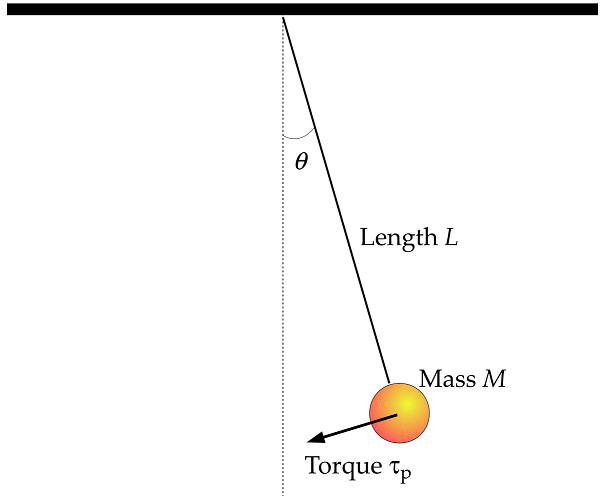

In [9]:
from IPython.display import Image # needed to embed an image
Image(filename='Pendulum.png', embed=True) # image downloadable from Moodle

The image above (download/view it from Moodle if it doesn't show up) shows a pendulum of length $L$ with a bob of mass $M$. We assume that all the mass of the system is in the bob, and that the system is rigid.

The pendulum experiences a torque
$$
  \tau_p = MgL \sin(\theta),
$$

and we also know that the torque of a rigid body is  given by

$$
  \tau = I \alpha,
$$

where $I$ is the moment of inertia and $\alpha$ the angular
acceleration. These are given by

$$
  I = ML^2 \qquad \text{and} \qquad  \alpha = \frac{d\omega}{dt} = \frac{d^2\theta}{dt^2},
$$

where $\omega$ is the angular velocity.
We can then rewrite the equation for the torque in terms of the
angular position of the pendulum (note that a minus sign appears because the torque and the angle are measured in opposite directions):

$$
  \tau_p = - I \frac{d^2\theta}{dt^2}.
$$

Substituting and rearranging gives us the equation of motion for
the pendulum:

$$
  \frac{d^2\theta}{dt^2} = - \frac{MgL}{I} \sin(\theta) = - \frac{g}{L}
  \sin(\theta),
$$
 which tells us that the bob accelerates towards the rest point at $\theta = 0$, and that the acceleration is dependent on the sine of the angle of displacement.

Now, if we were solving this analytically, we'd be stuck - there's no exact analytical solution to this. We'd need to make an approximation in order to continue. The obvious one here is to use the small angle approximation, and put $\sin(\theta) \approx \theta$, which (as the name suggests) is only valid when $\theta$ is small. This transforms the problem into a linear ODE, which is simple to solve analytically, and gives familiar sinusoidal motion.

But by using our numerical methods, we can solve this system for big angles. We can separate out into two first-order equations, as before, where the two variables are now the angle $\theta$ (c.f. position $y$) and the angular velocity $\omega$ (c.f. y-velocity)

$$ \frac{d \theta}{d t} = \omega$$

$$ \frac{d \omega}{dt} = -\frac{g}{L}\sin\theta $$

## Task instructions:

### <div class="alert alert-success"> For this task, start a new notebook from scratch. <br> <br> Remember to use text cells to describe your reasoning and results, and comments to annotate the code. Aim for a completely self-contained notebook.<br> <br>You can cut and paste code, equations and images from this notebook if you want, as long as your notebook makes it clear where you have pasted material and where it came from. </div>

1. Set up a python function, analogous to our function f(r,t) above, to calculate $\frac{d \theta}{d t}$  and $\frac{d \omega}{dt}$ for the non-linear pendulum.

3. Use the Runge-Kutta routine as above (it's fine to copy and paste the function, but state in the comments if you do this) to solve for a pendulum with $L = 1 \rm{m}$ released from rest at time $t = 0 {\rm s}$ for a duration of 20 seconds, with an initial angle (in radians) of $\theta = 0.99 \pi$  (this start angle is nearly vertical - about as far from a small angle as possible!). 

4. Plot the angle $\theta$ and the angular velocity $\omega$ as a function of time on a **single** appropriately labelled plot. 
5. In a separate plot, compare these results with results obtained from the linear approximation where  $\sin \theta \approx \theta$ (you can do this either analytically or using a new function to calculate numerically). You may find it clearer to use either subplots or two separate plots, one for the angular positions and one for the angular velocities.
6.  To make our pendulum even more realistic, we can also include a damping term. For this we need to define a damping coefficient $c$ (start with $c=0.01$), and to take into account the mass of the bob (use $M = 0.1$ kg). The expression for the angular acceleration then becomes
$$
\frac{d \omega}{dt}  = -\frac{g}{L}\sin(\theta)  - \frac{c \omega}{M L^2}
$$
Write a new function to calculate for the damped motion of the pendulum, and plot these results in addition to the undamped results. Make sure you've used the process above where the name of the function is sent as an argument to the Runge Kutta function.
7. The following code cell contains incomplete vpython code to create an animation of your results. All the vpython objects are already set up for you. When complete, this code will produce three separate animations: an animation of the pendulum/bob system for both the undamped and damped systems; an animated version of your plot of $\theta(t)$ and $\omega(t)$ for the damped system; and an animated [phase space](https://en.wikipedia.org/wiki/Phase_space) plot (an plot of $\omega$ against $\theta$).
Copy and paste this code into your task Notebook, and then:
    1. Add extra code to include the animation of your damped non-linear pendulum. 
    2. Add extra code to complete the animated plot of $\theta(t)$ and $\omega(t)$ against $t$
    3. Add extra code to complete the animated phase space plot of $\omega(t)$ against $\theta(t)$.
    4. Use a text cell to briefly explain what the phase space plot is showing, and what you think is interesting about it.

Feel free to change the properties of any of the vpython objects. 
Note that if you want to rerun the animation, you may need to restart the kernel and clear all output.
 

In [13]:
from vpython import sphere, cylinder, color, rate, vector, gcurve, canvas, graph

win=450 # canvas window size parameter

##############################################################
### Set up the animation window objects
animation = canvas( width=win, height=win, align='left')

# first set up the objects:
pivot = vector(0,0,0) # pivot point at centre of display


### for the undamped system...
# the rigid rod connecting the bob to the pivot point...
rod = cylinder(pos=pivot, axis = vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.01, color=color.green, opacity = 0.5)

# ...and the bob.
bob = sphere(pos=vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.1, color=color.blue, opacity = 0.5)


### for the damped system
# the rigid rod connecting the bob to the pivot point...
rod_d = cylinder(pos=pivot, axis = vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.01, color=color.magenta)

# ...and the bob.
bob_d = sphere(pos=vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.1, color=color.purple)

###################################################################
### Set up the graph windows 
### see https://www.glowscript.org/docs/VPythonDocs/graph.html for info and documentation

graph1 = graph(width=win, height=win/2, align="right",
      title='<b> θ (cyan), ω (red)</b>',
      xtitle='<i>time (s)</i>', ytitle='<i>θ (rads), ω (rads/s)</i>',
      foreground=color.black, background=color.white,
      xmin=0, xmax=20, ymin=-6, ymax=6)

graph2 = graph(width=win, height=win/2, align="right",
      title='<b>Phase space: undamped (green), damped (magenta) </b>',
      xtitle='<i>θ (rads) </i>', ytitle='<i>ω (rads/s)</i>',
      foreground=color.black, background=color.white,
      xmin=-4, xmax=4, ymin=-7, ymax=7)

# set up the curve objects for the plots
anglecurve = gcurve(graph=graph1, color=color.cyan) # a graphics curve for the *angle*
velcurve = gcurve(graph=graph1, color=color.red)    # a graphics curve for the *angular velocity*, etc
phasecurvedamp = gcurve(graph=graph2, color=color.magenta)
phasecurveundamp = gcurve(graph=graph2, color=color.green)


####################################################################
# Run the animation:
# Loop over the solutions already calculated 
for i in range(0,N):
    
    ### Main vpython animation:
    angle = rsol[0,i]         # undamped solution
    angle_d = damped_sol[0,i] # damped solution
                              # you may need to edit the variable names
                              # depending on your own implementation
    
    ## undamped system:
    # change the axis of the bob
    rod.axis = vector(L*np.sin(angle), -L*np.cos(angle),0)
    #update the position of the bob:
    bob.pos = vector(L*np.sin(angle),-L*np.cos(angle),0)
    
    ## damped system:
    #
    #
    # ADD CODE AND COMMENTS HERE TO ANIMATE FOR THE DAMPED SYSTEM 
    # USING YOUR RESULTS FROM ABOVE
    #
    

    ### Plot window animations
    tpoint = i*tend/N # scale the t-component manually
    ## Update the curves with the current animation point:
    
    # first for the plot of posn and velocity against time...
    anglecurve.plot(tpoint,damped_sol[0,i] ) 
    # ADD A LINE OF CODE HERE TO COMPLETE THE CURVE OF $\omega$ AGAINST t
    
    # ...then for the plot in phase space
    # ADD CODE HERE TO ANIMATE THE PLOT OF $\omega$ AGAINST $\theta$
    # FOR THE UNDAMPED (use phasecurveundamp object) AND DAMPED
    # (use phasecurvedamp object) SOLUTIONS
    
    
    rate(50) # framerate for all windows
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: name 'L' is not defined